# 04 - Supervised Learning (Classification)
Train baseline models and evaluate using Accuracy, Precision, Recall, F1, ROC-AUC.


In [1]:
# Change working directory
import os
os.chdir(r'D:\Books and Courses\Machine Learning\Sprints x Microsoft Summer Camp - AI and Machine Learning\Comprehensive Machine Learning Full Pipeline on Heart Disease UCI Dataset (Graduation Project)\Heart_Disease_Project')

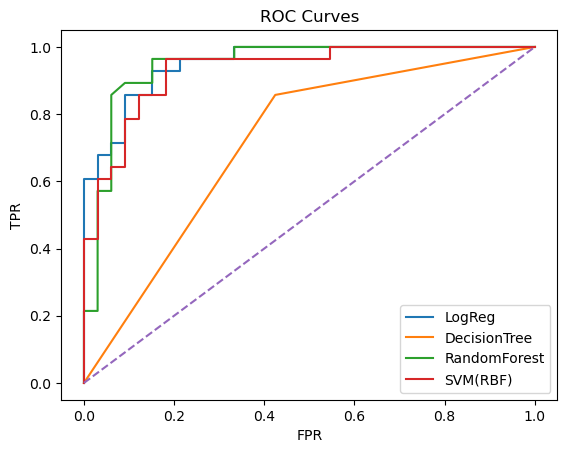

Saved results/evaluation_metrics.txt


In [2]:
import numpy as np, joblib, json
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Load preprocessed data 
train_npz = Path('data/cleaned_train.npz')
test_npz = Path('data/cleaned_test.npz')
assert train_npz.exists() and test_npz.exists(), 'Run 01_data_preprocessing.ipynb first.'
tr = np.load(train_npz); te = np.load(test_npz)
X_train, y_train = tr['X'], tr['y']
X_test, y_test = te['X'], te['y']

# Define models to evaluate and compare
models = {
    'LogReg': LogisticRegression(max_iter=2000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=300, random_state=42),
    'SVM(RBF)': SVC(probability=True, kernel='rbf', random_state=42)
}

# Train, predict, evaluate and plot ROC for each model
metrics = {}
plt.figure()
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, 'predict_proba') else None
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else float('nan')
    metrics[name] = {'accuracy':acc,'precision':pre,'recall':rec,'f1':f1,'auc':auc}
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name}')

plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curves')
plt.legend(); plt.show()

# Append metrics to results file 
lines = []
for name, m in metrics.items():
    lines.append(f"{name}: Acc={m['accuracy']:.3f}, Prec={m['precision']:.3f}, Rec={m['recall']:.3f}, F1={m['f1']:.3f}, AUC={m['auc']:.3f}")
open('results/evaluation_metrics.txt','a').write('\n'.join(lines) + '\n')
print('Saved results/evaluation_metrics.txt')